# Unsupervised Learning

A good starter to the field of Machine Learning is to start with Unsupervised Learning. In unsupervised learning, we are not trying to predict anytihng, as there are no target variables. Rather in unsupervised learning, the aim is to find patterns within the data, see if there are clusters possible, where within a cluster the data behaves similarly.

Though unsupervised learning is not targeted towards predicting anything, it comes in very handy when exploring a dataset. For example the data we have is about purchasing and demographic behavior of customers. Now, instead of trying to build a model to predict the spenidng amount of a customer, we can see whether there are possible groups within customers whose behaviors are very similar. In marketing we do customer segmentation based on prior information such as demographic groups, locations, psychographic groups. In unsupervised learning, in cluster modeling, we will create segments based on the data. We call is post segmentation, where we can study different clusters based on their behaviors with the shop, and then check if there are common characterestics among the clusters. So in this session we will look at two ways of clustering - 1. K Means clustering, and 2. Hierarchical Clustering.

For unsupervised learning, we will be needing a library known as Sickit Learn, which is the largest library in Python for machine learning. We will start by installing the library in the Anaconda interface, and then we will use the following steps:
1. We load the model object
2. Fit the model to the data
3. Finally, we see which of the data points belong to which clusters by predicting the clusters
4. Then we check whether there is any difference within the clusters in terms of the data

First we start by loading the necessary libraries - Sickit Learn, as well loading the visualization libraries and Pandas to work with the data

In [2]:
# For loading the dataset
import pandas as pd

# For visualization
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

For unsupervised learning, and in fact for most machine learnign we will be using Sickit learn library. Its a vast library with almost everything to do with machine learning, and we will be importing some parts of it from time to time. But first, making sure that we indeed have the Sickit Learn Library

In [3]:
# Installing Sickit Learn
import sys

!{sys.executable} -m pip install sklearn

## K Means Clustering

One of the most common unsupervised learning methods, clustering, is the K Means clustering. By K, we are referring to the number of clusters we are planning to craete. If we want to create 4 clusters, we will call it 4 means clustering. The way K means work is:
1. First we mention in the algorithms how many clusters we want - say for now we want 4
2. So the algorithm will randomly chose 4 points in the dataset, and then measure - 
a) The number variance of distance between the the 4 points
b) The variance of distance among points which are close to each of these 4 points
3. The objective of the algotrithm is to maximize the variance between the groups and minimize the variance within the groups. So after calculating a and b for the previous step, the algorithm will try again with another set of 4 points
4. This iteration will keep on going until the algorithm reaches a point where the variance between is highest in comparison to variance among the group

If you want more details on the algorithm, explained in a super easy matter feel free to check this video - https://www.youtube.com/watch?v=4b5d3muPQmA&t=3s
In fact, follow the channel and see its other videos, I consider the guy to be a genius - simply explaining the most complicated of stuffs

Now lets get to work with our own Direct Marketing dataset

In [4]:
# Loading the dataset
dm = pd.read_csv("/Users/muhammadsaqifulalam/Dropbox/My Mac (FVFD1URVP3XY)/Desktop/DirectMarketing.csv")

# Checking the first few lines of the dataset
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


Now loading the K Means package from sklearn and running the clustering

In [7]:
# Importing the K Means library
from sklearn.cluster import KMeans

# Creating the model object - and lets say we want to see 4 clusters
k_means_model = KMeans(n_clusters = 4)

# Fitting the model to our data
k_means_model.fit(dm)

# Finally predicting the output of the model
k_means_model.predict(dm)

ValueError: could not convert string to float: 'Old'

As you can see, we have an error here. What the error is telling us is that the KMeans algorithm cannot process the string "Old". Basically what it is telling us is that the data has columns where there is non numeric data and it is not being able to handle it. So what can we do? This is where we use a very handy approach, one-hot dummy coding. Instead of storing a categorical variable as a text, we can convert it into different columns of 0 and 1, where one means that row has values of that column and 0 means that the row does not have that column's value. For example, for Age column in our dataset, we can convert the column into 3 columns - Age_Middle, Age_Old, Age_Young. A customer who is middle aged will have Age_Middle as 1, and Age_Old as 0 and Age_Young as 0. Similarly a Young customer will have Age_Middle = 0, Age_Old = 0, Age_Young = 1. Might sound a lot of work, and you have convert each column at a time, but the beauty of Pandas is its just one line of code!

In [8]:
# Carrying out the one-hot coding
dm_dummies = pd.get_dummies(dm)

# Taking a peek at the results
dm_dummies.head()

,Salary,Children,Catalogs,AmountSpent,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,755,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1318,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,296,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,2436,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1304,1,0,0,1,0,1,0,0,1,1,0,1,0,0


As you can see, all our categorical columns are converted to 0/1s, so the full dataset is numeric. Now lets go on about our clustrering again

In [10]:
# Creating the model object - and lets say we want to see 4 clusters
k_means_model = KMeans(n_clusters = 4)

# Fitting the model to our data
k_means_model.fit(dm_dummies)

# Finally predicting the output of the model
k_means_model.predict(dm_dummies)

array([0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 3, 0, 3, 3, 1, 1, 1, 0, 2, 2, 0,
       0, 0, 0, 3, 1, 1, 1, 2, 0, 1, 1, 3, 1, 2, 1, 0, 0, 2, 1, 3, 1, 1,
       0, 3, 1, 0, 3, 1, 1, 1, 3, 0, 0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 3, 0, 0, 2,
       0, 2, 1, 3, 1, 2, 2, 2, 3, 2, 1, 1, 2, 0, 0, 0, 2, 1, 3, 2, 1, 1,
       3, 0, 3, 3, 0, 2, 0, 1, 0, 2, 2, 0, 1, 3, 2, 2, 0, 2, 0, 2, 3, 1,
       2, 3, 0, 0, 2, 0, 1, 2, 2, 3, 3, 2, 1, 2, 3, 1, 0, 2, 0, 2, 3, 1,
       2, 0, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 1, 3, 1, 3, 2, 0, 0, 0, 1, 1,
       0, 2, 0, 1, 0, 1, 0, 3, 0, 1, 0, 0, 0, 3, 2, 1, 0, 2, 2, 1, 3, 3,
       2, 2, 3, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 1, 2, 2, 1, 3, 3, 2, 0, 0,
       0, 3, 0, 1, 3, 2, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 2, 0, 1,
       3, 2, 1, 3, 1, 0, 1, 2, 2, 2, 2, 2, 1, 3, 2, 0, 1, 2, 2, 2, 0, 3,
       3, 3, 1, 1, 2, 3, 1, 1, 2, 1, 1, 3, 2, 0, 2, 2, 1, 3, 3, 1, 0, 0,
       1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0, 3, 0, 0, 3,

Well, what is this??!! Seems like a list of 0,1, 2 and 3. These are the cluster membership number. This tells us that the first row of the dataset belongs to cluster 0, the second one belongs to cluster 1, the third one belongs to cluster 2 and so on. Lets create a list out of it, and then add them to our original dataset's copy

In [11]:
# Copying the dm to analyse the k means clusters created
dm_kmeans = dm

# Creating a list which will store the predictions of the KMeans 
membership = k_means_model.predict(dm_dummies)

# Creating a new column in dm_kmeans copy of dm, to add the column which has the cluster membership information
dm["Membership"] = membership

# Taking a peak at the dm_kmeans dataset
dm_kmeans.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Membership
0,Old,Female,Own,Single,Far,47500,0,High,6,755,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,2
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,1


Now lets see if the formation of the clusters have helped us form any insights. We can start with pairwise comparisons plots

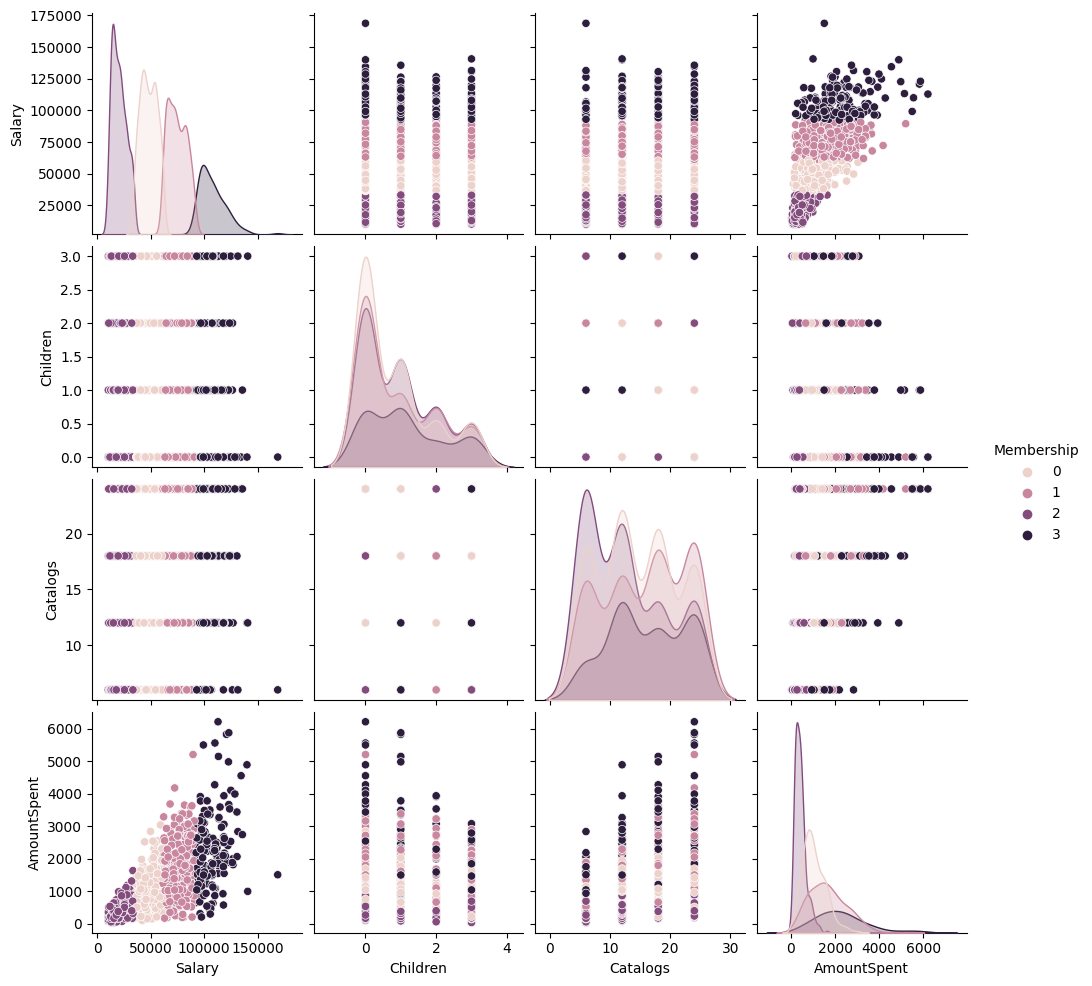

In [12]:
# Create a pairwise comparison plot, by coloring the plots as per each cluster
sns.pairplot(dm_kmeans, hue = "Membership")

Seems like other than Spending amount and Salary, these 4 groups did not differ much among each other. Lets see how they are doing as per categorical variables

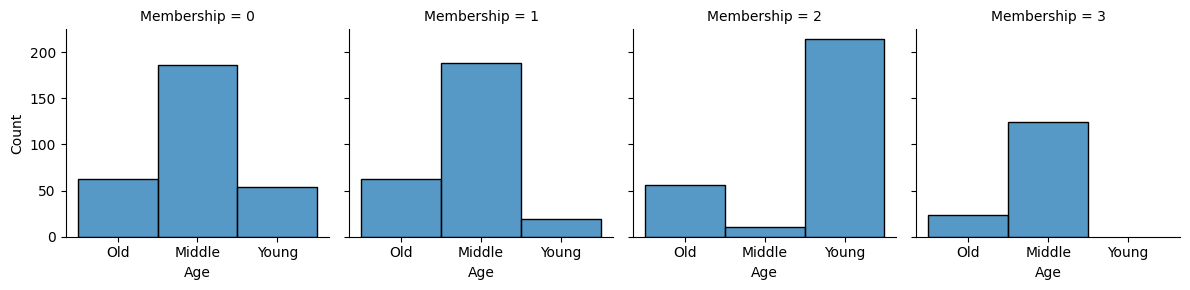

In [22]:
# Visualizing Age counts divided by each cluster

# First creating dividing the charting area by membership
chart = sns.FacetGrid(dm_kmeans, col = "Membership")

# Now mapping the histplot in each of the facets for the distribution of Age
chart.map(sns.histplot, "Age")

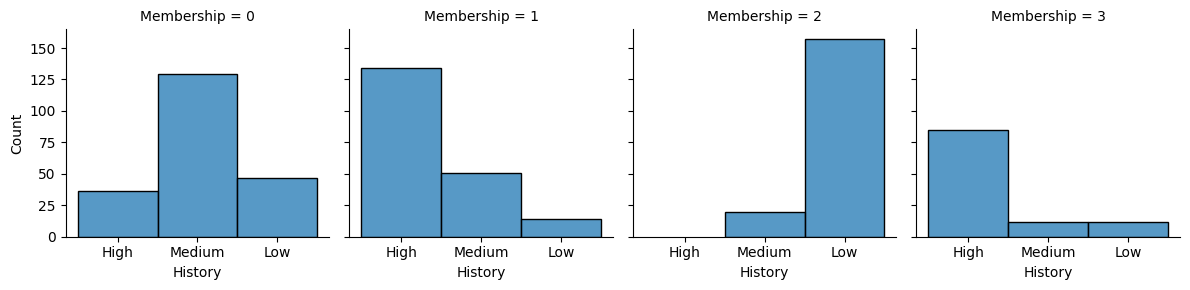

In [24]:
# We can do the simialar for say History
chart = sns.FacetGrid(dm_kmeans, col = "Membership")
chart.map(sns.histplot, "History")

It seems like there is a certain pattern in the frequency of visits of the customers. Cluster 0 is predominantly Medium history customers and Cluster 2 predominantly Low history customers, and Cluster 1 and 3 are similar. Now what about spending behavior among these clusters, something we are genuinely interested in

<AxesSubplot:xlabel='Membership', ylabel='AmountSpent'>

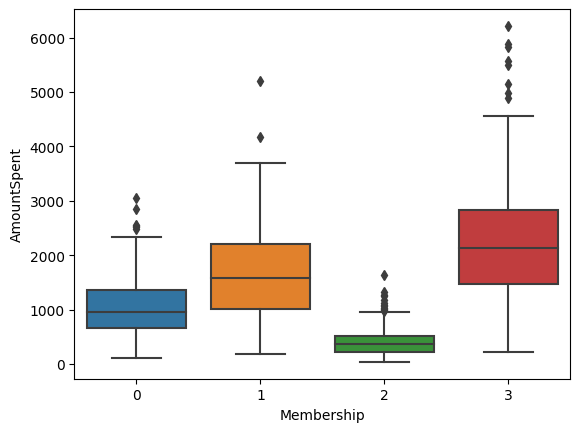

In [25]:
# Creating boxplots among spending amount of each of the clusters
sns.boxplot(x = "Membership", y = "AmountSpent", data = dm_kmeans)

This might indicate that there is some difference among the different clusters we have formed so far. But before we make any strategic decisions for any of these clusters, we can first check whether this difference is statistically valid. We will use ANOVA to test this

In [27]:
# We start with installig bioinfokit library, just to make sure it is inthe anaconda environment
!{sys.executable} -m pip install bioinfokit

# Import the statistical test package from bioinfokit
from bioinfokit.analys import stat

# Create the test object
res = stat()

# Run ANOVA test
res.anova_stat(df = dm_kmeans, res_var = "AmountSpent", anova_model = "AmountSpent ~ Membership")

# Printing the test result
print(res.anova_summary)

               df        sum_sq       mean_sq          F    PR(>F)
Membership    1.0  1.947563e+07  1.947563e+07  21.518514  0.000004
Residual    998.0  9.032536e+08  9.050637e+05        NaN       NaN


To furtehr check this, we can also do a Tukeys HSD

In [28]:
res.tukey_hsd(df = dm_kmeans, res_var = "AmountSpent", xfac_var = "Membership", anova_model = "AmountSpent ~ Membership")

res.tukey_summary

/Users/muhammadsaqifulalam/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0,1,651.926614,400.793362,903.059866,9.454459,0.001
1,0,2,593.471592,334.412991,852.530192,8.343420,0.001
2,0,3,1214.172062,914.290948,1514.053175,14.745969,0.001
3,1,2,1245.398206,982.517611,1508.278801,17.254084,0.001
4,1,3,562.245447,259.056511,865.434384,6.753903,0.001
5,2,3,1807.643653,1497.858277,2117.429030,21.251721,0.001


Seems like none of the differences among any of the cluster groups spending amount have any chance of having 0, which means that the spening behavior between the four clusters are indeed very different

One major concern with the way we did K means is that we arbitrarily chose that there will be 4 segments/groups. But what if the ideal segmentation is 2 groups? What if it is 9 groups. In order to do so, we can make use of our for loops and get a specific number called the Sum of Squared Distances - which measures the distance among the points within a group. The lesser this distance, the more similar will be the behavior of the members of this group. For our example, smaller values of this number will mean that the customers behave very similarly within the groups we have created. Fisrt lets see how to get the sum of squared distances value

In [29]:
# Sum of squared distances
k_means_model.inertia_

71297714119.35281

The optimal partitioning will reduce this distance to as low as possible, without craeting too many groups. Lets see how we can achieve this optimization

In [30]:
# First we create an empty list, SSD 
SSD = []

# Next we create a range of clusters we will input
K = range(1, 11)

# Now we repeat craeting the cluters in the dataset and generating the SSD scores and then storing them in our SSD empty list
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(dm_dummies)
    SSD.append(km.inertia_)

# Lets see how our list of SSD looks like
SSD


[937344152000.501,
 285930798081.62524,
 131102879071.71362,
 71296704654.43358,
 47692709440.163376,
 34067217916.058258,
 25843303495.67044,
 20450024621.97907,
 16850651101.135113,
 13499830102.306637]

A better way of representing this information is through a Elbow plot - a like plot showing the number of Ks in X asis and SSD in Y axis

<AxesSubplot:>

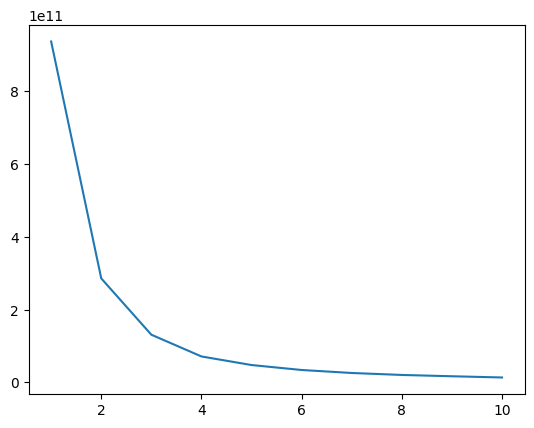

In [31]:
# Creating the elbow plot
sns.lineplot(x = K, y = SSD)

This shows that the highest reduction of SSD is when we create 3 to 4 clusters. So the assumption of starting with 4 clusters was well justified!!!

## Hierarchical Clustering

Another common unsupervised learning approach is called hierarchical clustering. In this approach, the algorithm starts by dividing the data into two or more major groups. And then for each of the groups, the algorithm tries to break them down into groups, and then so on. Technically in hierarchical clustering, we can create the number of clusters equaling the total size of the dataset, but, say for our example, 1000 clusters for 1000 customers will mean our startegy will be to approach each customer separately, and thats not possible practically speaking.

Again, a good intro to Hierarchical Clustering can be found in StatQuest channel - https://www.youtube.com/watch?v=7xHsRkOdVwo

In order to carry out Hierarchical Clustering, we will need to carry out few more preprocessing of the data. The steps will be:
1. Generate dummies for the dataset
2. Normalize the dataset, so that we have apples tp apples comparison
3. Generate a dendogram to understand how many clusters will be optimal
4. Finally based on the number of optimal clusters, create the clusters and analyze the behavior

We have already created the dummy dataset from dm. Now we can normalize the dateset. The logic of normalizing the dataset is to divide each column by its mean and standard deviation to generate a Z socre which makes each value of each of the columns comparable.

To start with, we will need to load the normalize package from Sickit Learn, and then normalize the data

In [34]:
# Loading the Normalize package
from sklearn.preprocessing import MinMaxScaler

# Loading the function as an object
scaler = MinMaxScaler()

# Telling python that we want to use this to fit our dm dataset
scaled = scaler.fit_transform(dm_dummies)

# Scaled is the result, but not in a dataframe format. To get it in dataframe format for our later use
dm_scaled = pd.DataFrame(scaled, columns = dm_dummies.columns)

# To see how our scaled dataframe looks like
dm_scaled.head()

,Salary,Children,Catalogs,AmountSpent,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,0.235665,0.000000,0.000000,0.116038,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.337114,0.000000,0.000000,0.207153,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.021424,0.000000,0.666667,0.041754,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.475740,0.333333,0.666667,0.388089,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.367360,0.000000,0.333333,0.204888,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


Now we import the package we will use to create a dendogram. Dendogram is a plot which helps us identify how many hierarchical clusters will be ideal for the dataset

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [25.0, 25.0, 50.0, 50.0],
  [10.0, 10.0, 37.5, 37.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [145.0, 145.0, 163.75, 163.75],
  [130.0, 130.0, 154.375, 154.375],
  [110.0, 110.0, 142.1875, 142.1875],
  [82.5, 82.5, 126.09375, 126.09375],
  [23.75, 23.75, 104.296875, 104.296875],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [230.0, 230.0, 253.75, 253.75],
  [202.5, 202.5, 241.875, 241.875],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [292.5, 292.5, 322.5, 322.5]

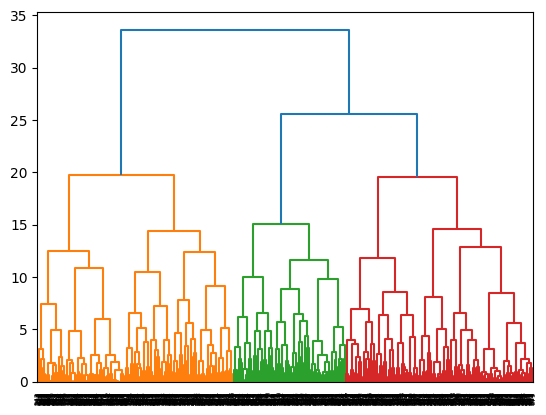

In [37]:
# Importing the package required for the dendogram
import scipy.cluster.hierarchy as shc

# Draw the dendogram
shc.dendrogram(shc.linkage(dm_scaled, method = "ward"))

What a dendogram shows us is that what is the difference between the clusters. If we decide to get more than 30 difference, then we might need to create 2 clusters using heirarchical clustering. If we are okay with distance/difference of 25, then we can stick with 3 clusters. The question here can be what is the best cutoff point for distances. That is based on the how differing you need the groups to be. From the dendogram we can see that around 25, the division is betwenn 2 parts, the one which further divides when it reaches 20, and the other which divides when the distance reaches 25, and then further divides when it reaches 20. Based on this we can either decide to create two major groups, or 3, where one of the groups  will have 2 other subgroups. Lets start by creating 3 groups

In [39]:
# We start, like kmeans, by loading the clustering algorithm
from sklearn.cluster import AgglomerativeClustering
# This library have few other advanced methods of clustering, but due to time limitations will be very hard to cover
# every concept of clustering

# Creating the cluster object
hclust = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")

# Creating the clusters
hclust.fit(dm_scaled)

# Storing the cluster membership data on a list
membership = hclust.fit_predict(dm_scaled)

# Replacing the previous kmeans clustering membership data with the new hclust membership data
dm["Membership"] = membership

# Taking a peek
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Membership
0,Old,Female,Own,Single,Far,47500,0,High,6,755,2
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,0
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,1


The next steps are very similar to kmeans, but lets go through them one more time, checking how the data is behaving as per the clusters

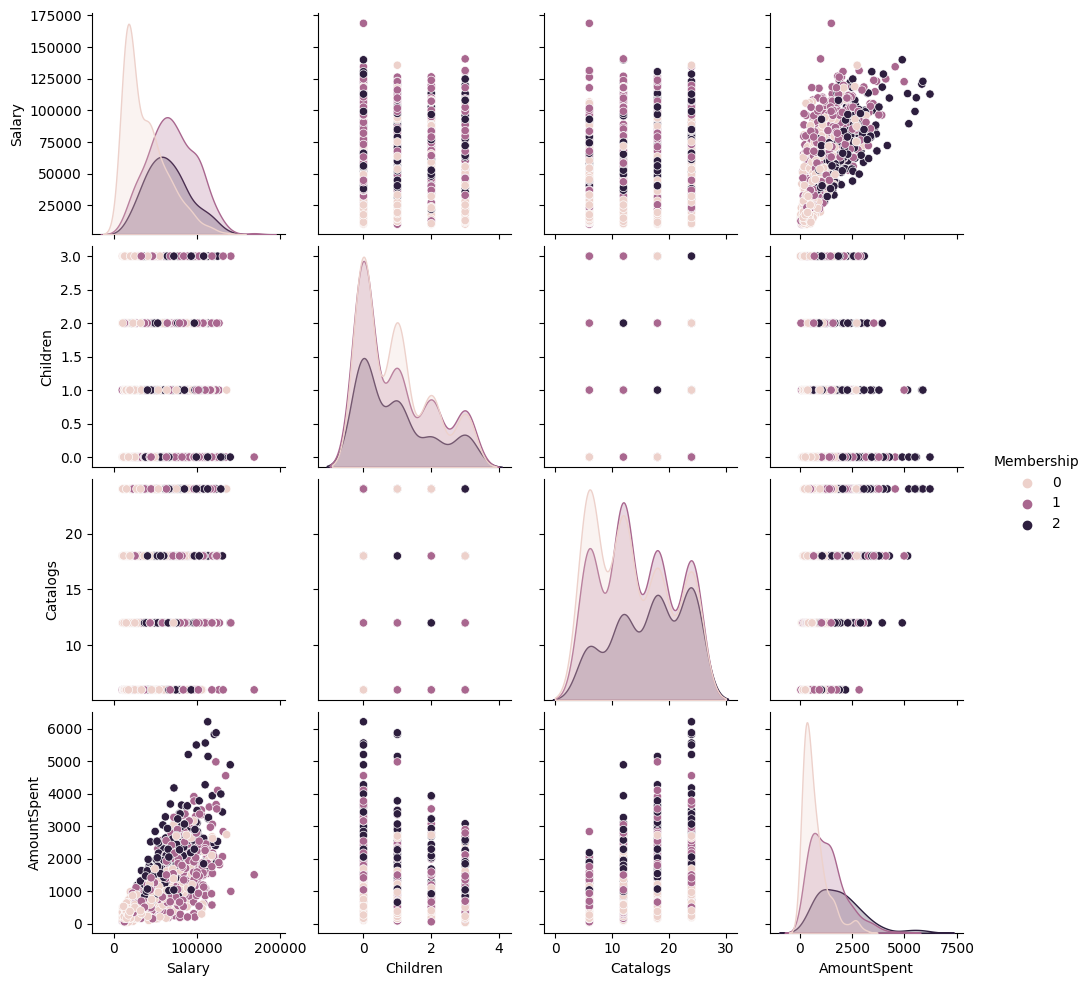

In [40]:
# Paiplots colored by clusters
sns.pairplot(dm, hue = "Membership")

As you can see, the Hieharchical clusters grouping is differently calculated from the kmeans clusters, and the grouping distribution is different. Lets check few more visualizations

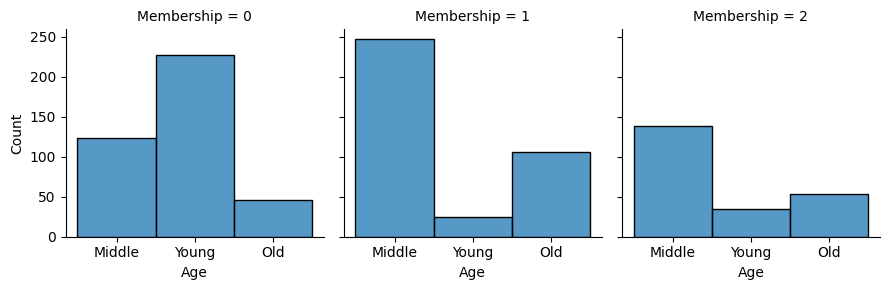

In [41]:
# Visualizing the age distribution as per each cluster. First creating the facet grids
chart = sns.FacetGrid(dm, col = "Membership")

# Then plotting the age distribtution for each of the memberships
chart.map(sns.histplot, "Age")

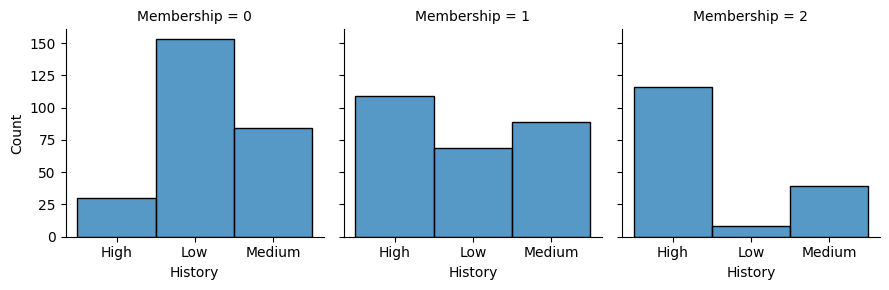

In [42]:
# Similarly for the frequency of visit distribution
chart = sns.FacetGrid(dm, col = "Membership")

# Then plotting the History distribution
chart.map(sns.histplot, "History")

As you can see, the Hierarchical clustering has given very different nature of clusters. To be honest, we would need to go into much deeper than just few charts to truly understand the nature of each of the clusters, but one thing that we can do for now is to check whether the spenidng amount is different across the clusters

<AxesSubplot:xlabel='Membership', ylabel='AmountSpent'>

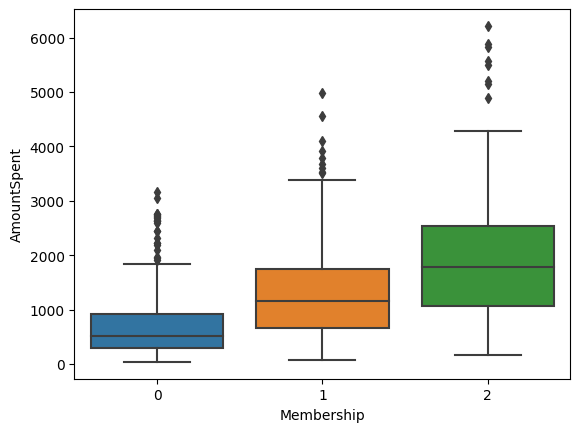

In [43]:
# Lets start with checking the spending pattern distribution across membership
sns.boxplot(x = "Membership", y = "AmountSpent", data = dm)

Seems to be different, but also there are some overlaps. Lets check by ANOVA

In [46]:
# Creating the anova model - lets go directly to Tukey Intervals
res.tukey_hsd(df = dm, res_var = "AmountSpent", xfac_var = "Membership", anova_model = "AmountSpent ~ Membership")
res.tukey_summary

/Users/muhammadsaqifulalam/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,2,0,1410.261759,1212.403951,1608.119566,23.675999,0.001
1,2,1,863.160635,665.302828,1061.018442,14.491062,0.001
2,0,1,547.101124,374.823940,719.378308,10.548765,0.001


The result confirms that there is no chance of any of the difference to be 0, which means that each of the groups spent statistically significantly differently from each other

This concludes a primer to Unsupervised Learning. The key thing to remember about Unsupervised learning is that its Unsupervised - we are not trying to predict something specific, there is not target variable. This means, its difficult to identify whether a solution is optimal, and there is absolutely no gold standard. Then why learn it? Why is there algorithms doing Unsupervised Learning. Because it is very very useful in telling us some unique observations of different